In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [23]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [4]:
cifar = keras.datasets.cifar10

In [5]:
(train_images,train_labels), (test_images,test_labels) = cifar.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [6]:
train_images, test_images = train_images/255.0, test_images/255.0

In [20]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

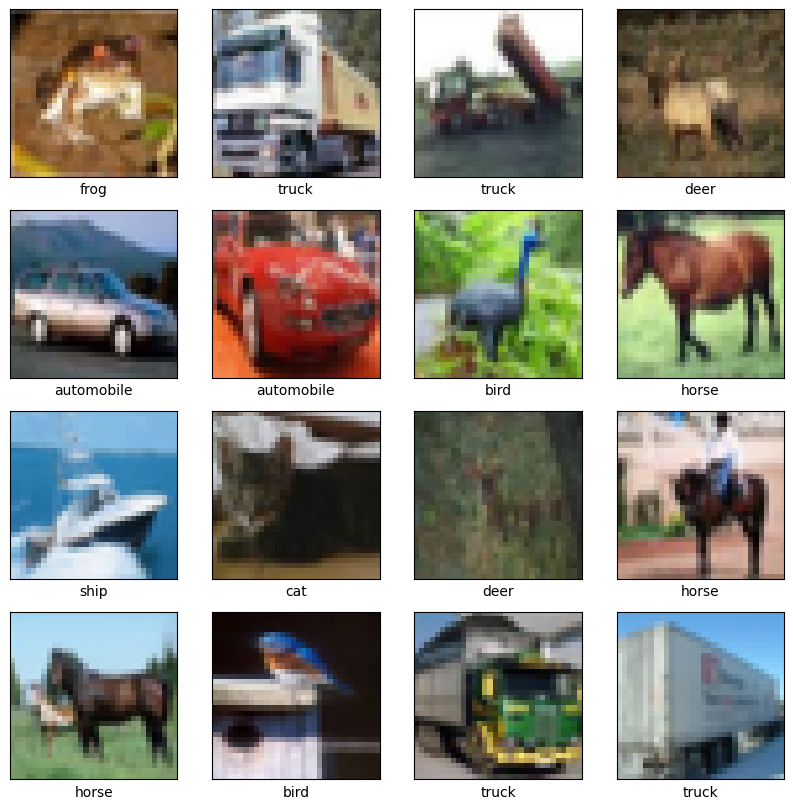

In [21]:
def show():
  plt.figure(figsize=(10,10))
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap= plt.cm.binary)
    plt.xlabel(class_names[ train_labels[i][0]])
  plt.show()

show()

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4869 - accuracy: 0.4601 - val_loss: 1.2208 - val_accuracy: 0.5679
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1239 - accuracy: 0.6014 - val_loss: 1.1278 - val_accuracy: 0.5926
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9717 - accuracy: 0.6554 - val_loss: 0.9679 - val_accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8741 - accuracy: 0.6922 - val_loss: 0.9099 - val_accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7983 - accuracy: 0.7207 - val_loss: 0.8810 - val_accuracy: 0.6915
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7401 - accuracy: 0.7384 - val_loss: 0.9500 - val_accuracy: 0.6689
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6901 - accuracy: 0.7564 - val_loss: 0.8901 -

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 6s - loss: 0.8916 - accuracy: 0.7153 - 6s/epoch - 19ms/step

Test accuracy: 0.7153000235557556


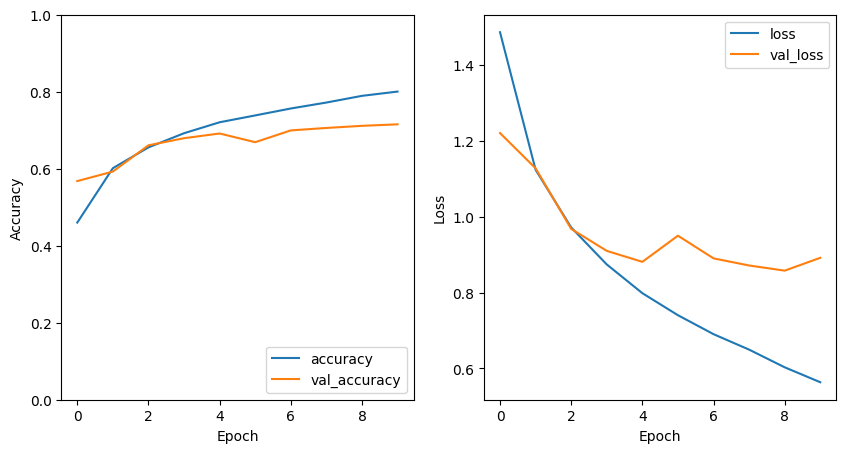

In [16]:
def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

plot_training_history(history)

In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 12ms/step


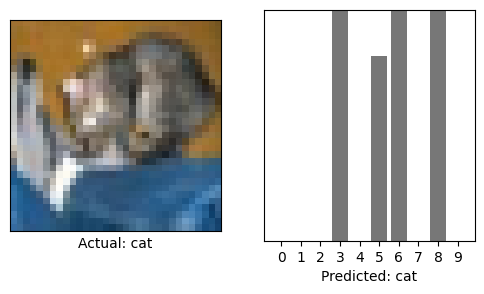

In [24]:
def plot_sample_prediction(images, labels, predictions, class_names, index=0):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[index], cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {class_names[labels[index][0]]}")

    plt.subplot(1,2,2)
    plt.xticks(range(10))
    plt.yticks([])
    plt.grid(False)
    plt.bar(range(10), predictions[index], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions[index])
    plt.xlabel(f"Predicted: {class_names[predicted_label]}")
    plt.show()

plot_sample_prediction(test_images, test_labels, predictions, class_names)